# Food Dataset Analysis (EDA)

### Suggestions / Things to Explore in EDA (both datasets):

Note: for each insight found about the dataset, it is recommended to explain what it tells us about the dataset, why it's significant, 

- [ ] **Dataset directory and split integrity:** verify the expected Food-101 structure and examine the `/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256` directory and contents. Confirm class counts match expectations (1,000 images per class)
- [ ] **Image resolutions and aspect ratios:** plot width / height histograms, aspect ratios, resolution scatter, and detect outliers
- [ ] **Brightness / contrast and dynamic range:** inspect pixel intensity histograms and per-image mean/std. Find and keep note of any overly dark, blown-out, or low-contrast classes (for normalization)
- [ ] **Sharpness / blur and quality issues:** use Laplacian variance for blur scores to identify classes with many blurry images


### UEC-Food256 Dataset
Things to consider while looking / exploring dataset

- [ ] **Dataset directory names:** as you can see when you first download the dataset, the folders are named as numbers (1-256). It would be a good idea to rename each folder based on the `category.txt` file which stores the name and id
  - After renaming, check to see if there are any folders of the same name. If there are, decide to merge or keep separate with reasoning.
- [ ]

### Resources:
(may be helpful)
*   https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection
*   https://medium.com/@juanabascal78/exploratory-image-analysis-part-1-advanced-density-plots-19b255075dbd
*   https://www.datacamp.com/tutorial/seeing-like-a-machine-a-beginners-guide-to-image-analysis-in-machine-learning

## Import + Download Dataset

In [2]:
%pip install python-dotenv
%pip install roboflow



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.3/892.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 10.3 MB/s eta 0:00:00 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.1 MB/s eta 0:00:00a 0:00:01
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: opencv-python-headless
   

In [3]:
%pip install kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
# # Clear all kagglehub cache
# !rm -rf /root/.cache/kagglehub
# !rm -rf ~/.cache/kagglehub
# !rm -rf /kaggle/working/.cache

# # Verify it's gone
# !ls -la /root/.cache/ 2>/dev/null || echo "Cache cleared"

In [4]:
# RUN FOR UEC-FOOD256 DATASET

import kagglehub 
# Download latest version 
path = kagglehub.dataset_download("rkuo2000/uecfood256")
print("Path to dataset files:", path)

/Users/audreylu/Library/Python/3.12/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.94G/3.94G [04:32<00:00, 15.5MB/s]

Extracting files...


Path to dataset files: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1


In [26]:
# RUN FOR YUSUF FOOD DATASET
"""
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()  # loads variables from .env into the environment

api_key = os.getenv("YF_API_KEY")

rf = Roboflow(api_key=api_key) 
project = rf.workspace("caretech").project("food-dataset-uj20h-w2s4m")
version = project.version(1)
dataset = version.download("yolov8")
"""

In [4]:
import os

for subdir, dirs, files in os.walk(path):
    print(f"{subdir} → {len(files)} files")

/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1 → 0 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256 → 2 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/44 → 106 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/99 → 139 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/86 → 129 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/135 → 116 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/220 → 112 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/160 → 109 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/64 → 121 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/178 → 115 files
/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/234 → 105 files
/root/.cache/kagglehub/datasets/rkuo2

In [5]:
import os
import re
import shutil

DATA_ROOT = os.path.join(path, "UECFOOD256")
CATEGORY_TXT_PATH = os.path.join(path, "UECFOOD256","category.txt")

In [6]:
# rename uec food 256 directories
def sanitize_name(name: str) -> str:
  """
  make a filesystem-safe folder name
  - lowercase
  - trim
  - replace spaces with underscores
  - remove non-alphanumeric characters
  """
  s = name.strip().lower()
  s = s.replace("’", "'")  # normalize curly apostrophes
  s = s.replace('"', '')
  s = s.replace("/", " ")  # avoid path separators
  s = s.replace("\\", " ")
  s = s.replace("&", " and ")
  s = s.replace("+", " plus ")
  s = s.replace("–", "-").replace("—", "-")  # dashes
  s = s.replace("’", "'")
  s = s.replace("’", "'")
  # replace whitespace with underscores
  s = re.sub(r"\s+", "_", s)
  # remove invalid chars (keep a-z0-9 _ - . ')
  s = re.sub(r"[^a-z0-9_\-\.']", "", s)
  # collapse underscores
  s = re.sub(r"_+", "_", s)
  # strip leading/trailing underscores or dots
  s = s.strip("._")
  # fall back if empty
  if not s:
    s = "unnamed"
  return s


def parse_category_txt(path: str) -> dict:
  """
  parse category.txt file
  @return dict mapping numeric id (str) -> sanitized_name
  """
  id_to_name = {}
  if not os.path.isfile(path):
    raise FileNotFoundError(f"category.txt not found at {path}")
  with open(path, "r", encoding="utf-8") as f:
    for line in f:
      line = line.strip()
      if not line or line.startswith("#"):
        continue
      # Lines may be "id  name" with multiple spaces; first token is id, rest is name
      parts = re.split(r"\s+", line, maxsplit=1)
      if len(parts) != 2:
        # skip headers like "id  name"
        continue
      id_str, raw_name = parts
      if not id_str.isdigit():
        continue
      safe = sanitize_name(raw_name)
      id_to_name[id_str] = safe
  return id_to_name


def rename_dirs(root: str, id_to_name: dict, dry_run: bool = False) -> list:
  """
  Rename directories in root from numeric id to category name
  @return list of (old_path, new_path)
  """
  changes = []
  if not os.path.isdir(root):
    raise NotADirectoryError(f"Root path not found: {root}")

  # list only top-level directories
  for entry in os.listdir(root):
    old_path = os.path.join(root, entry)
    if not os.path.isdir(old_path):
      continue
    if not entry.isdigit():
      # Already renamed or a non-id dir like 'UECFOOD256' or 'category.txt' parent; skip
      continue
    id_str = entry
    if id_str not in id_to_name:
      print(f"Warning: id {id_str} not found in category.txt. Skipping.")
      continue
    base_name = id_to_name[id_str]
    new_name = base_name
    new_path = os.path.join(root, new_name)

    # resolve collisions
    if os.path.exists(new_path):
      # If target already exists and is the same folder (unlikely), skip
      # Else append id to make it unique
      alt_name = f"{base_name}_{id_str}"
      alt_path = os.path.join(root, alt_name)
      if os.path.exists(alt_path):
        # As a last resort append a numeric suffix
        suffix = 2
        while True:
          candidate = f"{base_name}_{id_str}_{suffix}"
          candidate_path = os.path.join(root, candidate)
          if not os.path.exists(candidate_path):
            new_name = candidate
            new_path = candidate_path
            break
          suffix += 1
      else:
          new_name = alt_name
          new_path = alt_path

    if dry_run:
      print(f"[DRY RUN] Would rename: {old_path} -> {new_path}")
    else:
      os.rename(old_path, new_path)
      changes.append((old_path, new_path))
      print(f"Renamed: {old_path} -> {new_path}")
  print("changes: ", changes)
  return changes



print(f"Reading categories from: {CATEGORY_TXT_PATH}")
id_to_name = parse_category_txt(CATEGORY_TXT_PATH)
print(f"Parsed {len(id_to_name)} categories.")

# preview changes first
print("\nPreview (dry run):")
rename_dirs(DATA_ROOT, id_to_name, dry_run=True)

# if preview looks good, do actual rename
proceed = True
if proceed:
    print("\nApplying renames:")
    changes = rename_dirs(DATA_ROOT, id_to_name, dry_run=False)
    print(f"\nDone. Renamed {len(changes)} folders.")
else:
    print("\nNo changes applied.")

Reading categories from: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/category.txt
Parsed 256 categories.

Preview (dry run):
[DRY RUN] Would rename: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/135 -> /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/clear_soup
[DRY RUN] Would rename: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/61 -> /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/steak
[DRY RUN] Would rename: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/95 -> /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/pizza_toast
[DRY RUN] Would rename: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/132 -> /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/french_bread

## Data Analysis

In [8]:
# Imports for analysis
%pip install seaborn
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import defaultdict
from tqdm import tqdm
import pandas as pd

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Define the dataset root
DATA_ROOT = os.path.join(path, "UECFOOD256")
print(f"Dataset root: {DATA_ROOT}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Dataset root: /Users/audreylu/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256


### 1. Dataset Directory Structure and Integrity

Scanning classes: 100%|██████████| 256/256 [00:00<00:00, 7871.08it/s]


Total classes: 256
Total images: 31395
Average images per class: 122.6
Min images in a class: 100
Max images in a class: 728


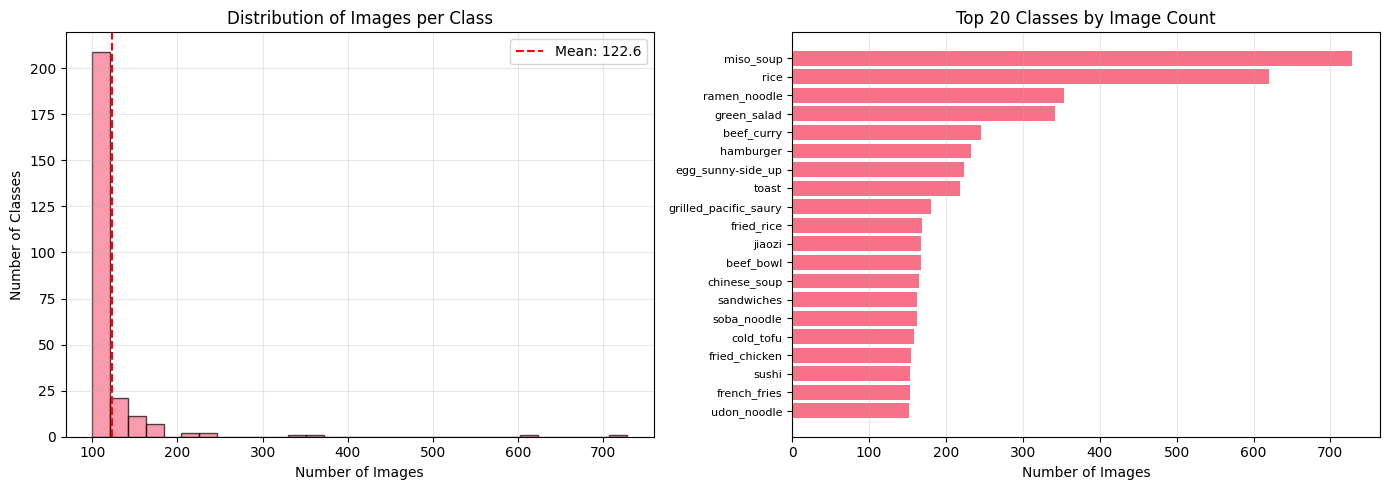

In [9]:
def analyze_dataset_structure(data_root):
    """
    Analyze the directory structure and count images per class.
    """
    class_stats = {}
    total_images = 0
    
    if not os.path.exists(data_root):
        print(f"ERROR: Dataset root not found at {data_root}")
        return None
    
    classes = [d for d in os.listdir(data_root) 
               if os.path.isdir(os.path.join(data_root, d)) 
               and d != '__MACOSX']
        
    for class_name in tqdm(classes, desc="Scanning classes"):
        class_path = os.path.join(data_root, class_name)
        
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        class_stats[class_name] = len(image_files)
        total_images += len(image_files)
    
    return class_stats, total_images, classes

class_stats, total_images, classes = analyze_dataset_structure(DATA_ROOT)

if class_stats:

    print(f"Total classes: {len(classes)}")
    print(f"Total images: {total_images}")
    print(f"Average images per class: {total_images / len(classes):.1f}")
    print(f"Min images in a class: {min(class_stats.values())}")
    print(f"Max images in a class: {max(class_stats.values())}")
    
    image_counts = list(class_stats.values())
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(image_counts, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Classes')
    plt.title('Distribution of Images per Class')
    plt.axvline(np.mean(image_counts), color='red', linestyle='--', label=f'Mean: {np.mean(image_counts):.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    sorted_counts = sorted(class_stats.items(), key=lambda x: x[1], reverse=True)[:20]
    class_names, counts = zip(*sorted_counts)
    plt.barh(range(len(class_names)), counts)
    plt.yticks(range(len(class_names)), class_names, fontsize=8)
    plt.xlabel('Number of Images')
    plt.title('Top 20 Classes by Image Count')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    

### 2. Image Resolutions and Aspect Ratios

Analyzing image dimensions (sampling 50 images per class)...


Analyzing dimensions: 100%|██████████| 256/256 [00:00<00:00, 263.84it/s]



Width statistics:
  Min: 104px, Max: 800px
  Mean: 493.3px, Median: 500.0px

Height statistics:
  Min: 78px, Max: 800px
  Mean: 409.7px, Median: 433.0px

Aspect ratio statistics:
  Min: 0.51, Max: 3.69
  Mean: 1.24, Median: 1.33


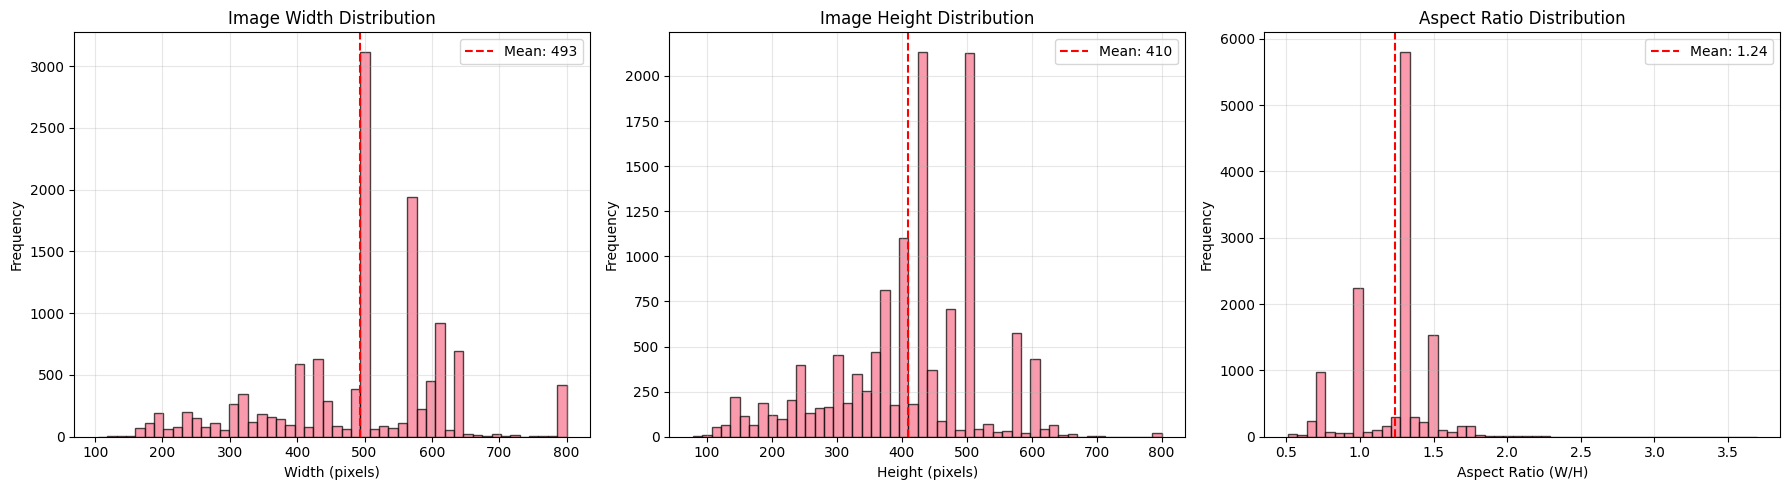

In [8]:
def analyze_image_dimensions(data_root, classes, sample_limit=None):
    """
    Analyze image dimensions, resolutions, and aspect ratios.
    If sample_limit is set, will only analyze that many images per class.
    """
    widths = []
    heights = []
    aspect_ratios = []
    resolutions = []
    
    total_to_process = len(classes) if sample_limit is None else len(classes) * sample_limit
    
    for class_name in tqdm(classes, desc="Analyzing dimensions"):
        class_path = os.path.join(data_root, class_name)
        
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        if sample_limit:
            image_files = image_files[:sample_limit]
        
        for img_file in image_files:
            try:
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
                    aspect_ratios.append(w / h)
                    resolutions.append(w * h)
            except Exception as e:
                continue
    
    return widths, heights, aspect_ratios, resolutions

print("Analyzing image dimensions (sampling 50 images per class)...")
widths, heights, aspect_ratios, resolutions = analyze_image_dimensions(
    DATA_ROOT, classes, sample_limit=50
)

print(f"\nWidth statistics:")
print(f"  Min: {min(widths)}px, Max: {max(widths)}px")
print(f"  Mean: {np.mean(widths):.1f}px, Median: {np.median(widths):.1f}px")
print(f"\nHeight statistics:")
print(f"  Min: {min(heights)}px, Max: {max(heights)}px")
print(f"  Mean: {np.mean(heights):.1f}px, Median: {np.median(heights):.1f}px")
print(f"\nAspect ratio statistics:")
print(f"  Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}")
print(f"  Mean: {np.mean(aspect_ratios):.2f}, Median: {np.median(aspect_ratios):.2f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Width distribution
axes[0].hist(widths, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Image Width Distribution')
axes[0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Height distribution
axes[1].hist(heights, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Image Height Distribution')
axes[1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Aspect ratio distribution
axes[2].hist(aspect_ratios, bins=50, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].axvline(np.mean(aspect_ratios), color='red', linestyle='--', label=f'Mean: {np.mean(aspect_ratios):.2f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### 3. Bounding Box Visualization

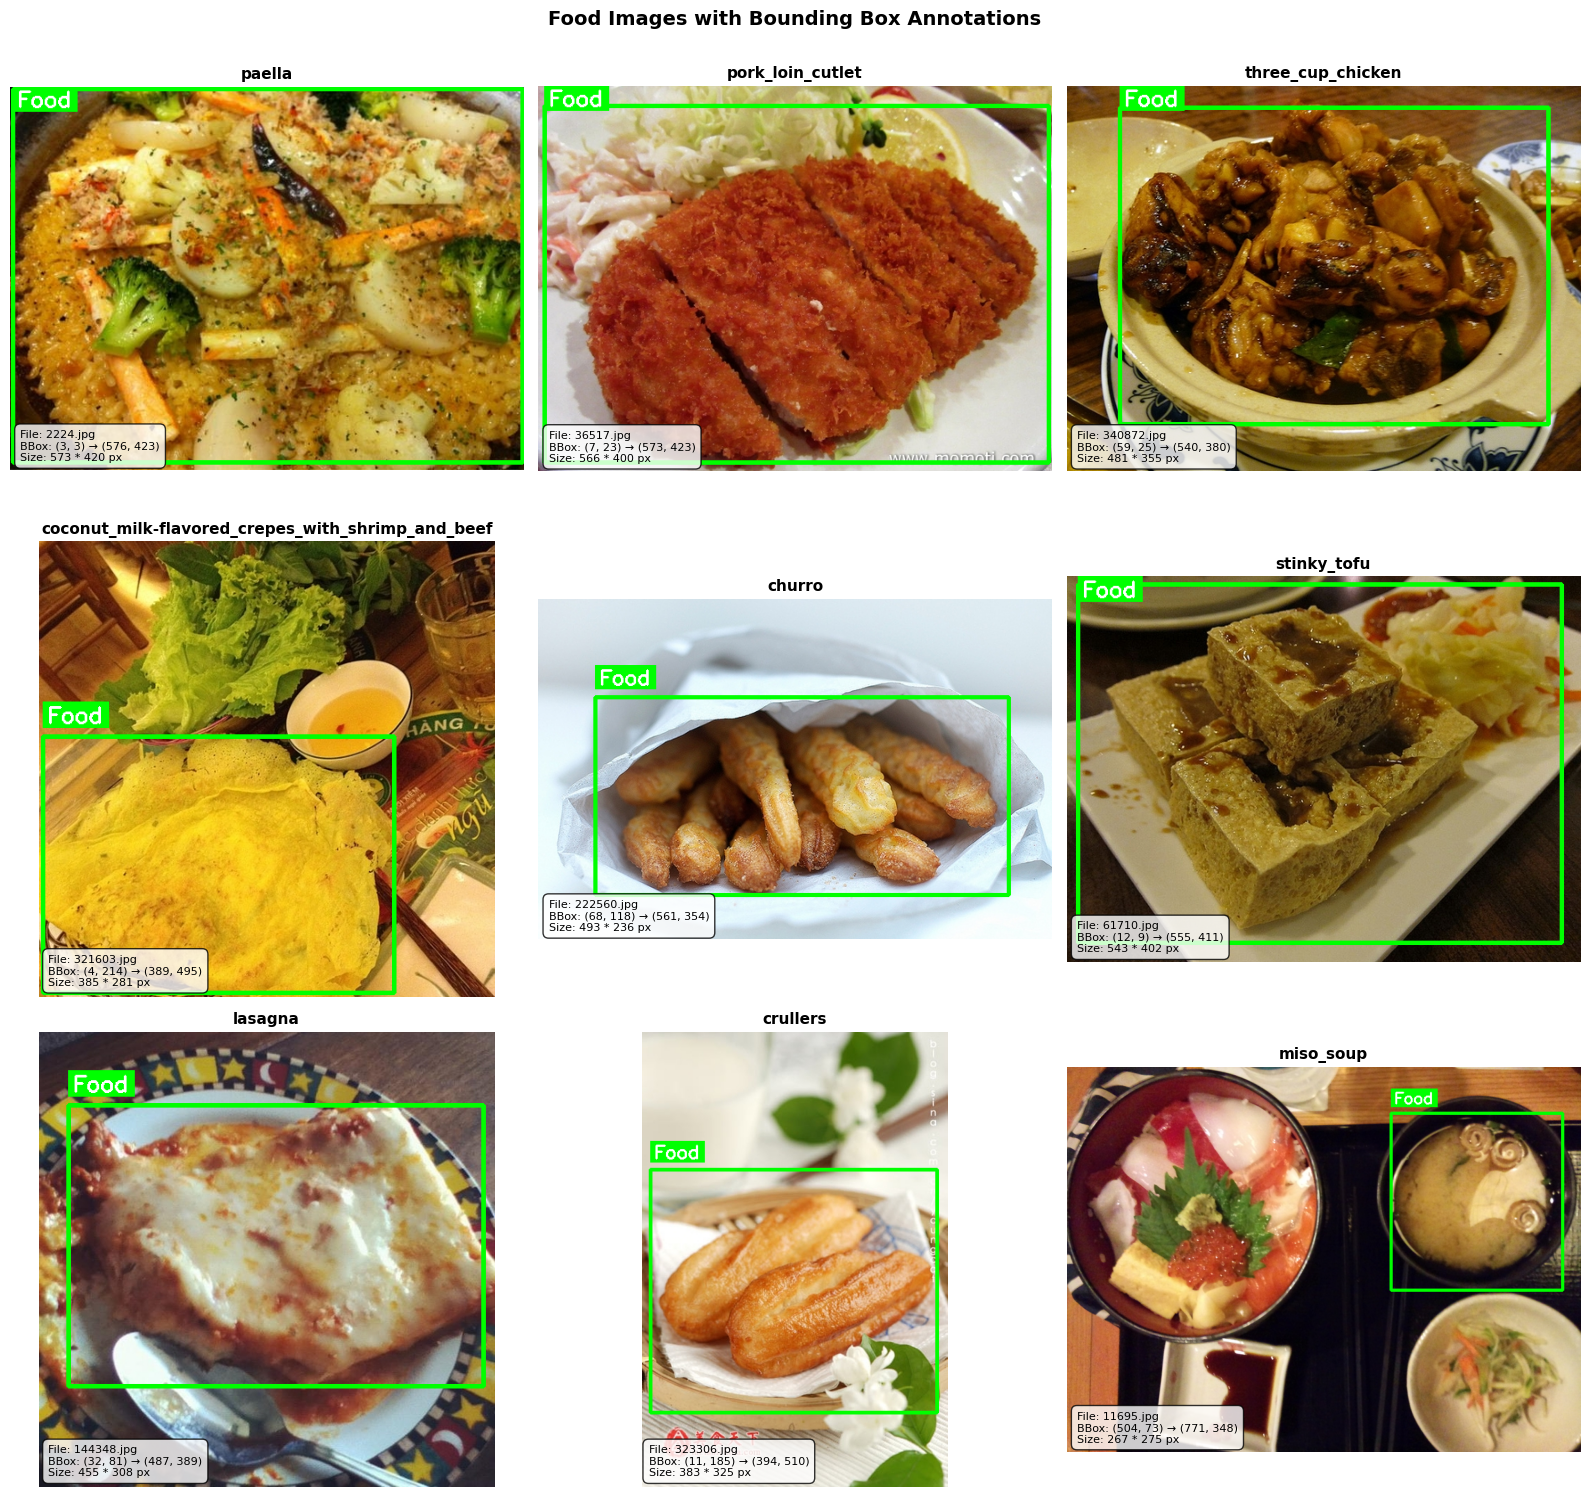

In [9]:
def load_bounding_boxes_robust(bb_file_path):
    """
    Load bounding box information from bb_info.txt file with robust error handling.
    Handles different formats and skips invalid lines.
    """
    bboxes = {}
    if not os.path.exists(bb_file_path):
        return bboxes
    
    with open(bb_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                continue
            
            parts = line.split()
            if len(parts) < 5:
                continue
            
            img_name = parts[0]
            
            try:
                x1, y1, x2, y2 = map(int, parts[1:5])
                bboxes[img_name] = (x1, y1, x2, y2)
            except ValueError:
                continue
    
    return bboxes


def find_matching_image(img_name_from_bbox, all_image_files):
    """
    Try to find a matching image file for a given name from bb_info.txt.
    Handles different naming conventions and file extensions.
    """
    if img_name_from_bbox in all_image_files:
        return img_name_from_bbox
    
    base_name = os.path.splitext(img_name_from_bbox)[0]
    for ext in ['.jpg', '.jpeg', '.JPG', '.JPEG', '.png', '.PNG']:
        candidate = base_name + ext
        if candidate in all_image_files:
            return candidate
    
    img_name_lower = img_name_from_bbox.lower()
    for img_file in all_image_files:
        if img_file.lower() == img_name_lower:
            return img_file
    
    return None


def draw_bbox_on_image(image, bbox, class_name, color=(0, 255, 0), thickness=3):
    """
    Draw a single bounding box on an image with label.
    """
    if isinstance(image, Image.Image):
        img_array = np.array(image)
    else:
        img_array = image.copy()
    
    if len(img_array.shape) == 2:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    elif img_array.shape[2] == 4:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)
    
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    
    x1, y1, x2, y2 = bbox
    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), color, thickness)
    
    label = "Food"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    
    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
    
    label_y = max(y1 - 10, text_height + 10)
    cv2.rectangle(img_bgr, 
                  (x1, label_y - text_height - 10), 
                  (x1 + text_width + 10, label_y), 
                  color, -1)
    
    cv2.putText(img_bgr, label, (x1 + 5, label_y - 5), 
                font, font_scale, (255, 255, 255), font_thickness)
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    return img_rgb


def collect_samples_with_bboxes(data_root, classes, num_samples=9, max_attempts=50):
    """
    Collect sample images with bounding boxes from the dataset.
    """
    samples = []
    attempts = 0
    checked_classes = set()
    
    shuffled_classes = list(classes)
    np.random.shuffle(shuffled_classes)
    
    for class_name in shuffled_classes:
        if len(samples) >= num_samples:
            break
        
        if attempts >= max_attempts:
            print(f"Reached max attempts ({max_attempts}). Found {len(samples)} samples.")
            break
        
        attempts += 1
        checked_classes.add(class_name)
        
        class_path = os.path.join(data_root, class_name)
        bb_file = os.path.join(class_path, "bb_info.txt")
        
        if not os.path.exists(bb_file):
            continue
        
        bboxes_dict = load_bounding_boxes_robust(bb_file)
        if not bboxes_dict:
            continue
        
        all_image_files = {f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))}
        
        if not all_image_files:
            continue
        
        matched_images = []
        for img_name_bbox in bboxes_dict.keys():
            matched_file = find_matching_image(img_name_bbox, all_image_files)
            if matched_file:
                matched_images.append((matched_file, bboxes_dict[img_name_bbox]))
        
        if not matched_images:
            continue
        
        img_file, bbox = matched_images[np.random.randint(0, len(matched_images))]
        img_path = os.path.join(class_path, img_file)
        
        try:
            img = Image.open(img_path).convert('RGB')
            img_with_bbox = draw_bbox_on_image(img, bbox, class_name)
            
            samples.append({
                'image': img_with_bbox,
                'class': class_name,
                'bbox': bbox,
                'filename': img_file
            })
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue
    
    return samples



samples = collect_samples_with_bboxes(DATA_ROOT, classes, num_samples=9)

if samples:
    n_samples = len(samples)
    n_cols = 3
    n_rows = (n_samples + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    
    if n_samples == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, sample in enumerate(samples):
        axes[idx].imshow(sample['image'])
        axes[idx].set_title(f"{sample['class']}", fontsize=11, fontweight='bold')
        axes[idx].axis('off')
        
        x1, y1, x2, y2 = sample['bbox']
        w, h = x2 - x1, y2 - y1
        
        info_text = f"File: {sample['filename']}\nBBox: ({x1}, {y1}) → ({x2}, {y2})\nSize: {w} * {h} px"
        axes[idx].text(0.02, 0.02, info_text, 
                      transform=axes[idx].transAxes, 
                      fontsize=8, 
                      verticalalignment='bottom',
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    for idx in range(n_samples, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Food Images with Bounding Box Annotations', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

### 4. Normalize Pixel Values

In [10]:
def normalize_pixels(image: np.ndarray, per_channel: bool = True, eps: float = 1e-7) -> np.ndarray:
    """Normalize pixel values to [0, 1] range.

    Args:
        image: Input image as a NumPy array (H, W) or (H, W, C).
        per_channel: If True, normalize each channel independently; otherwise use global min/max.
        eps: Small constant to avoid divide-by-zero when range is zero.

    Returns:
        Normalized image as float32 in [0, 1].
        
    """
    img = image.astype(np.float32)

    if per_channel and img.ndim == 3:
        min_vals = img.min(axis=(0, 1), keepdims=True)
        max_vals = img.max(axis=(0, 1), keepdims=True)
    else:
        min_vals = img.min()
        max_vals = img.max()

    denom = np.maximum(max_vals - min_vals, eps)
    normalized = (img - min_vals) / denom
    return normalized

In [19]:
def convert_to_uint8(image: np.ndarray) -> np.ndarray:
    """Convert image to uint8 format [0, 255].

    Args:
        image: Input image as a NumPy array (H, W) or (H, W, C).

    Returns:
        Image as uint8 in [0, 255].
    """
    if image.dtype == np.float32 or image.dtype == np.float64:
        image_uint8 = (image * 255).astype(np.uint8)
    else:
        image_uint8 = image.astype(np.uint8)
    return image_uint8

### 5. Noise Reduction

In [41]:
def noise_reduction(image: np.ndarray) -> np.ndarray:
    """Apply noise reduction to the image using Median Filtering and Bilateral Filtering.
    
    Args:
        image: Input image as float32 in [0, 1] or uint8 in [0, 255].
        
    Returns:
        Filtered image as uint8 in [0, 255].
    """
    # Apply median filter to reduce salt and pepper noise
    image_mf = cv2.medianBlur(image, 3)
    # Apply bilateral filter to reduce noise while preserving edges
    # image_bf = cv2.bilateralFilter(image_mf, d=7, sigmaColor=75, sigmaSpace=75)  # making it too blurry
    return image_mf

### 6. CLAHE

In [12]:
def contrast_enhancement(image: np.ndarray) -> np.ndarray:
    """Apply contrast enhancement to the image using CLAHE per channel.
    
    Args:
        image: Input image as uint8, either grayscale (H, W) or color (H, W, C).
        
    Returns:
        Contrast-enhanced image as uint8.
    """
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE per channel for color images
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Split channels, apply CLAHE to each, then merge
        channels = cv2.split(image)
        clahe_channels = [clahe.apply(channel) for channel in channels]
        return cv2.merge(clahe_channels)
    else:
        # Grayscale image or single channel
        return clahe.apply(image)

### 7. Filter 5 images

In [44]:
def filter_image(input_folder: str, file_name: str) -> np.ndarray:
    """Apply all filtering functions to a single image file.
    
    Args:
        input_folder: Path to the folder containing the image.
        file_name: Name of the image file.
        
    Returns:
        Filtered image as uint8 array, or None if loading fails.
    """
    image_path = os.path.join(input_folder, file_name)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error loading image from {image_path}")
        return None
    
    # Apply filtering pipeline
    image_normalized = normalize_pixels(image)  # Returns float32 [0, 1]
    image_uint8 = convert_to_uint8(image_normalized)  # Returns uint8 [0, 255]
    image_noise_reduced = noise_reduction(image_uint8)
    image_contrast_enhanced = contrast_enhancement(image_noise_reduced)
    
    return image_contrast_enhanced

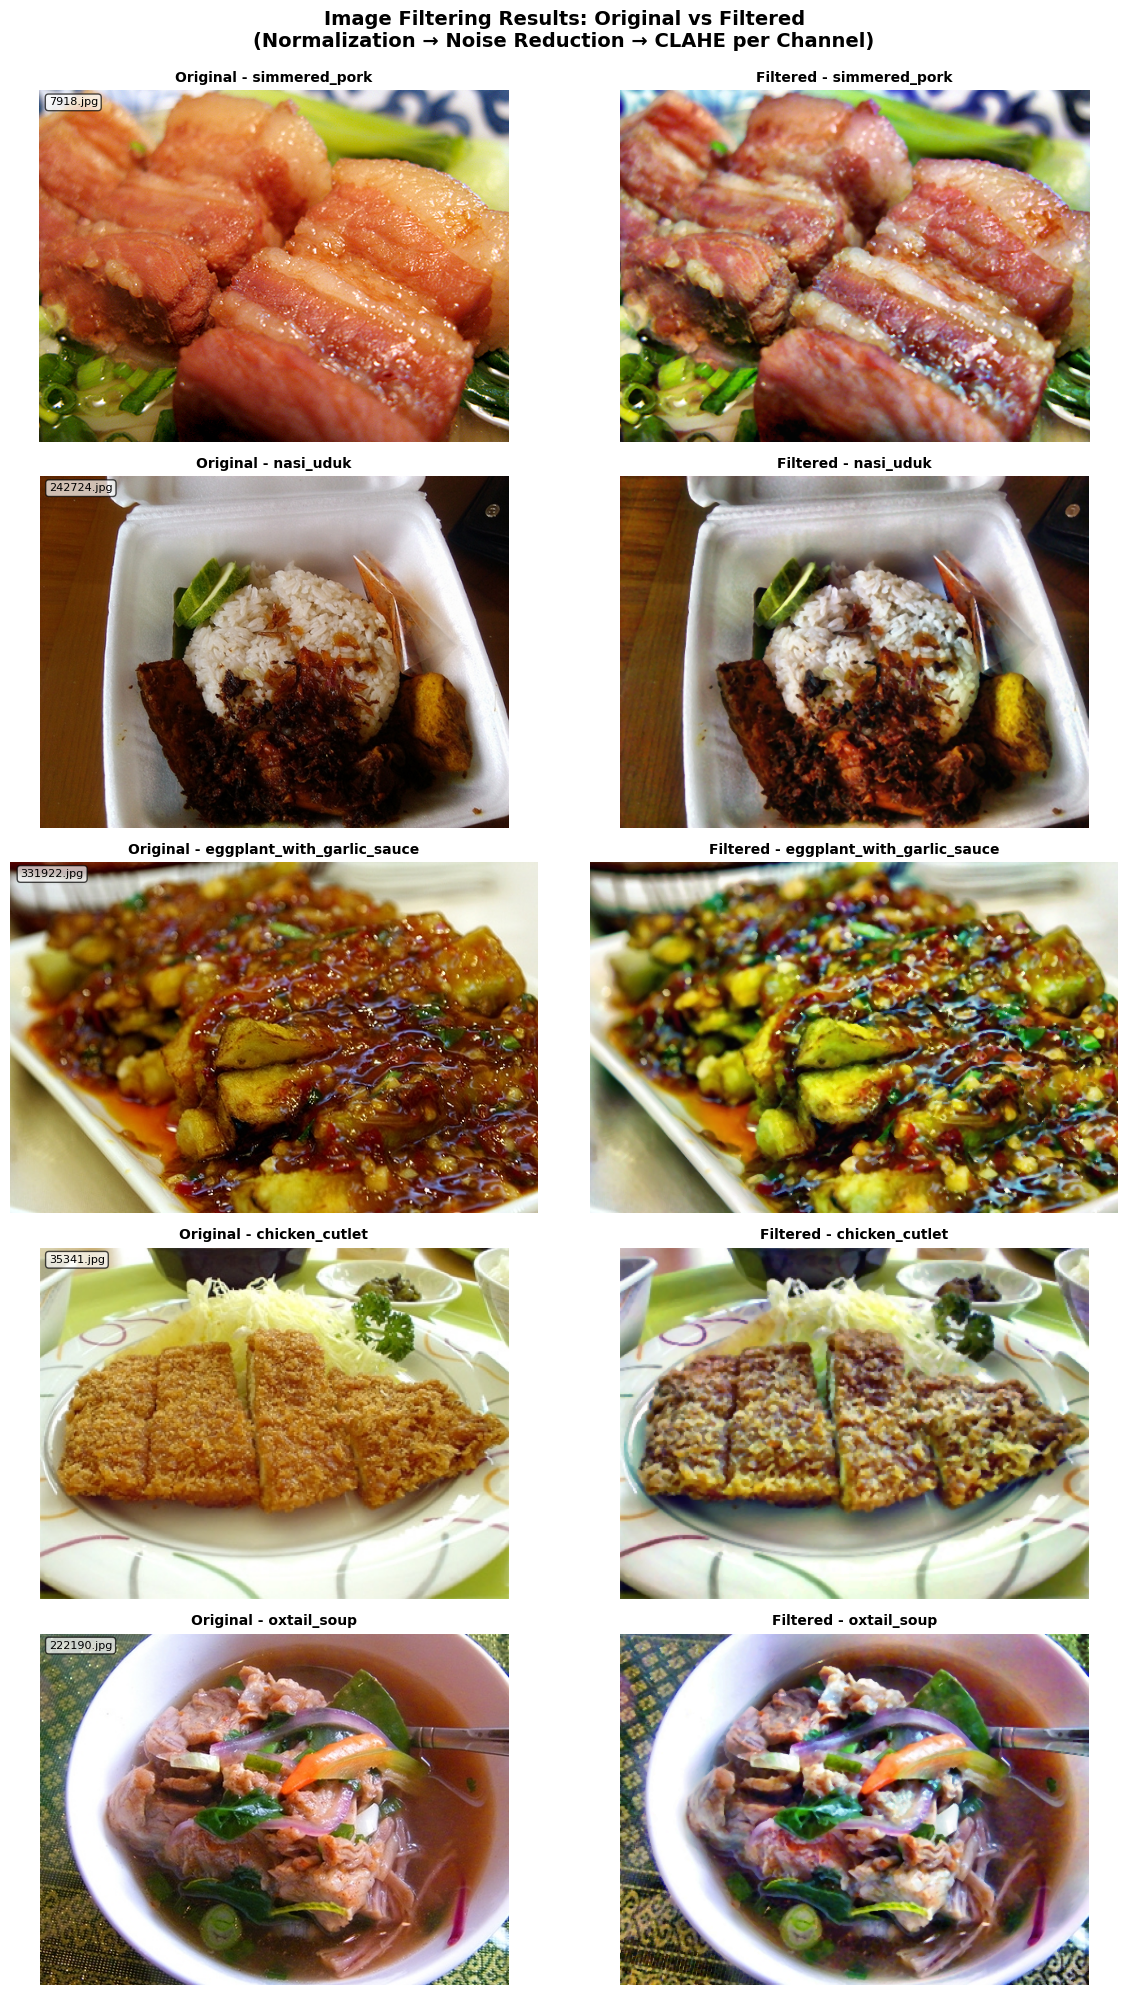


Filtering applied successfully to 5 images!
Pipeline: Normalize pixels → Median + Bilateral filtering → CLAHE (per channel)


In [45]:
# Select 5 random images from different classes and apply filtering
np.random.seed(42)  # For reproducibility
selected_classes = np.random.choice(classes, size=5, replace=False)

fig, axes = plt.subplots(5, 2, figsize=(12, 20))

for idx, class_name in enumerate(selected_classes):
    class_path = os.path.join(DATA_ROOT, class_name)
    
    # Get list of images in this class
    image_files = [f for f in os.listdir(class_path) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    
    if not image_files:
        continue
    
    # Select a random image
    img_file = np.random.choice(image_files)
    img_path = os.path.join(class_path, img_file)
    
    # Load original image
    original = cv2.imread(img_path)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    
    # Apply filtering
    filtered = filter_image(class_path, img_file)
    
    if filtered is not None:
        filtered_rgb = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
        
        # Display original
        axes[idx, 0].imshow(original_rgb)
        axes[idx, 0].set_title(f'Original - {class_name}', fontsize=10, fontweight='bold')
        axes[idx, 0].axis('off')
        
        # Display filtered
        axes[idx, 1].imshow(filtered_rgb)
        axes[idx, 1].set_title(f'Filtered - {class_name}', fontsize=10, fontweight='bold')
        axes[idx, 1].axis('off')
        
        # Add filename annotation
        axes[idx, 0].text(0.02, 0.98, img_file, 
                         transform=axes[idx, 0].transAxes,
                         fontsize=8, verticalalignment='top',
                         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.suptitle('Image Filtering Results: Original vs Filtered\n(Normalization → Noise Reduction → CLAHE per Channel)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nFiltering applied successfully to 5 images!")
print("Pipeline: Normalize pixels → Median + Bilateral filtering → CLAHE (per channel)")

### 8. Train, Validation, and Test Split
A stratified split with 80% train, 10% val, and 10% test

In [10]:
import math
import random
from pathlib import Path

# Create stratified train/val/test splits and write manifests
def compute_split_counts(n: int, train_ratio=0.8, val_ratio=0.1):
    # Floor to keep totals consistent, then borrow from train if a bucket is empty
    n_train = math.floor(n * train_ratio)
    n_val = math.floor(n * val_ratio)
    n_test = n - n_train - n_val
    if n_test == 0 and n >= 2:
        n_test, n_train = 1, max(n_train - 1, 0)
    if n_val == 0 and n >= 3:
        n_val, n_train = 1, max(n_train - 1, 0)
    return n_train, n_val, n - n_train - n_val


def stratified_split(data_root: str, class_names: list[str], seed: int = 42):
    rng = random.Random(seed)
    splits = {"train": [], "val": [], "test": []}
    for class_name in class_names:
        class_path = os.path.join(data_root, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if not image_files:
            continue
        rng.shuffle(image_files)
        n = len(image_files)
        n_train, n_val, n_test = compute_split_counts(n)
        train_files = image_files[:n_train]
        val_files = image_files[n_train:n_train + n_val]
        test_files = image_files[n_train + n_val:]
        # Store relative paths (relative to DATA_ROOT)
        splits["train"].extend([f"{class_name}/{f}" for f in train_files])
        splits["val"].extend([f"{class_name}/{f}" for f in val_files])
        splits["test"].extend([f"{class_name}/{f}" for f in test_files])
    return splits


splits = stratified_split(DATA_ROOT, classes)

# Write manifests to audrey_rushil/splits
splits_dir = Path.cwd() / "splits"
splits_dir.mkdir(parents=True, exist_ok=True)
for split_name, items in splits.items():
    manifest_path = splits_dir / f"{split_name}.txt"
    with manifest_path.open("w", encoding="utf-8") as f:
        for rel_path in sorted(items):
            f.write(rel_path + "\n")
    print(f"Wrote {len(items)} entries to {manifest_path.relative_to(Path.cwd())}")

Wrote 25011 entries to splits/train.txt
Wrote 3029 entries to splits/val.txt
Wrote 3355 entries to splits/test.txt
